In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test_df=pd.read_csv("test_x.csv")
data=train.copy()

In [3]:
data.head()

,index,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [4]:
data["Öbek İsmi"].value_counts()

obek_4    720
obek_8    717
obek_5    706
obek_3    695
obek_7    695
obek_1    692
obek_6    688
obek_2    547
Name: Öbek İsmi, dtype: int64

In [7]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

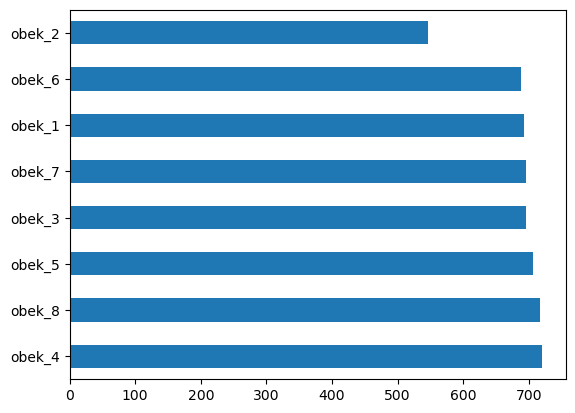

In [8]:
data["Öbek İsmi"].value_counts().plot.barh();

In [12]:
data.describe().round(3)

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
count,5460.000,5460.000,5460.000,5460.000,5460.000
mean,2729.500,363571.133,16616.612,24.041,73.446
std,1576.311,219714.442,14099.172,14.946,47.214
min,0.000,43922.989,2859.254,0.000,3.978
25%,1364.750,215693.439,4931.859,11.551,25.009
50%,2729.500,286925.436,8426.819,20.096,82.486
75%,4094.250,468188.222,30579.245,35.918,104.473
max,5459.000,1192437.145,48605.594,64.616,242.308


In [13]:
data.corr()

,index,Yıllık Ortalama Gelir,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Yıllık Ortalama Sepete Atılan Ürün Adedi
index,1.000000,0.036008,0.019259,0.012507,-0.001693
Yıllık Ortalama Gelir,0.036008,1.000000,0.740238,0.444398,0.145425
Yıllık Ortalama Satın Alım Miktarı,0.019259,0.740238,1.000000,0.418499,0.133864
Yıllık Ortalama Sipariş Verilen Ürün Adedi,0.012507,0.444398,0.418499,1.000000,0.659455
Yıllık Ortalama Sepete Atılan Ürün Adedi,-0.001693,0.145425,0.133864,0.659455,1.000000


In [14]:
data.drop("index",axis=1,inplace=True)

In [15]:
data.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Giyim,6417.780714,15.417239,Etmiyor,obek_3,17.097397
4,Erkek,31-40,Evli,Ortaokul Mezunu,İşsiz veya Düzenli Bir İşi Yok,397431.626948,Büyük Şehir,Giyim,7886.663061,14.689837,Etmiyor,obek_3,20.470459


In [17]:
df_2 = data[data["Öbek İsmi"] == "obek_2"]      


In [18]:
from sklearn.utils import resample
desired_sample_count = 150

df_2_upsampled = resample(df_2, replace=True, n_samples=desired_sample_count, random_state=12)



In [20]:
df_2_upsampled.shape

(150, 13)

In [23]:
balanced_data = pd.concat([data, df_2_upsampled])

In [ ]:
data["Öbek İsmi"].value_counts().plot.barh();